# sklearn

## preparing data

### student performance dataset

把[:-1]列作为features，G1列作为label

In [1]:
import os
import pandas as pd
import numpy as np


PATH = os.path.join(os.getcwd(), 'dataset', 'student+performance')
student_data_mat = pd.read_csv(os.path.join(PATH, 'student-mat.csv'), sep=';')
student_data_por = pd.read_csv(os.path.join(PATH,'student-por.csv'), sep=';')

student_data = pd.concat([student_data_mat, student_data_por], ignore_index=True)
student_data = student_data.drop(['G2', 'G3'], axis=1)
student_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,7
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,yes,no,5,4,2,1,2,5,4,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,no,4,3,4,1,1,1,4,15
1041,MS,F,18,U,GT3,T,1,1,other,other,...,no,no,1,1,1,1,1,5,6,11
1042,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,6,10


* 生成训练集和测试集

In [2]:
def generate_data(data:pd.DataFrame, ratio = 0.8) -> tuple[np.ndarray, np.ndarray]:
    np.random.seed(123)
    rand_idx = np.random.permutation(data.shape[0])
    train_size = int(data.shape[0] * ratio)
    train_data = data.iloc[rand_idx[:train_size], :]
    test_data = data.iloc[rand_idx[train_size:], :]
    return train_data, test_data

train_student, test_student = generate_data(student_data)
X_train, y_train = train_student.iloc[:, :-1], train_student.iloc[:, -1]
X_test, y_test = test_student.iloc[:, :-1], test_student.iloc[:, -1]
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (835, 30)
y_train shape: (835,)
X_test shape: (209, 30)
y_test shape: (209,)


In [7]:
print(type(X_train), type(y_train))
y_train

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


802     9
43      8
653    14
764    10
621    13
       ..
187    15
442    17
634     8
845    15
459    13
Name: G1, Length: 835, dtype: int64

### iris dataset


In [3]:
import os
import pandas as pd
import numpy as np


PATH = os.path.join(os.getcwd(), 'dataset', 'iris')
iris_np = np.loadtxt(os.path.join(PATH, 'iris.data'), delimiter=',', 
                        dtype=str)
# iris_np[:, :-1] = iris_np[:, :-1].astype(float)
iris_np

array([['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'],
       ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'],
       ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'],
       ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'],
       ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa'],
       ['5.4', '3.9', '1.7', '0.4', 'Iris-setosa'],
       ['4.6', '3.4', '1.4', '0.3', 'Iris-setosa'],
       ['5.0', '3.4', '1.5', '0.2', 'Iris-setosa'],
       ['4.4', '2.9', '1.4', '0.2', 'Iris-setosa'],
       ['4.9', '3.1', '1.5', '0.1', 'Iris-setosa'],
       ['5.4', '3.7', '1.5', '0.2', 'Iris-setosa'],
       ['4.8', '3.4', '1.6', '0.2', 'Iris-setosa'],
       ['4.8', '3.0', '1.4', '0.1', 'Iris-setosa'],
       ['4.3', '3.0', '1.1', '0.1', 'Iris-setosa'],
       ['5.8', '4.0', '1.2', '0.2', 'Iris-setosa'],
       ['5.7', '4.4', '1.5', '0.4', 'Iris-setosa'],
       ['5.4', '3.9', '1.3', '0.4', 'Iris-setosa'],
       ['5.1', '3.5', '1.4', '0.3', 'Iris-setosa'],
       ['5.7', '3.8', '1.7', '0.3', 'Iris-setosa'],
       ['5.1

In [4]:
iris_data = pd.DataFrame(iris_np, 
    columns=['sepal_length','sepal_width', 'petal_length', 'petal_width', 'class'])
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sepal_length  150 non-null    object
 1   sepal_width   150 non-null    object
 2   petal_length  150 non-null    object
 3   petal_width   150 non-null    object
 4   class         150 non-null    object
dtypes: object(5)
memory usage: 6.0+ KB


* 改变数据类型

In [5]:
col = ['sepal_length','sepal_width', 'petal_length', 'petal_width']
iris_data[col] = iris_data[col].astype(np.float64)
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* 数据可视化

<Figure size 640x480 with 0 Axes>

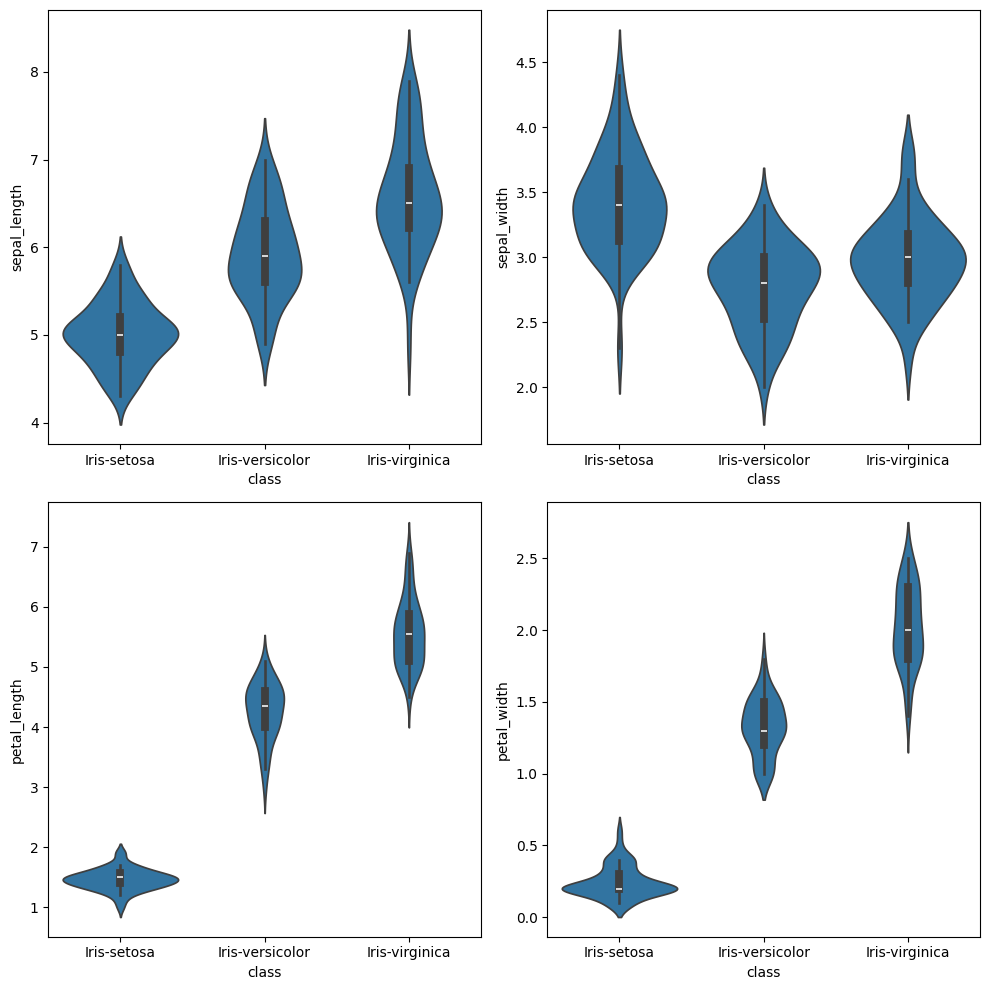

In [196]:
import seaborn 
import matplotlib.pyplot as plt

# 绘制violin plot
plt.figure()
_, subplot = plt.subplots(2, 2, figsize=(10, 10))
seaborn.violinplot(data=iris_data, x='class', y=iris_data.columns[0], ax=subplot[0, 0])
seaborn.violinplot(data=iris_data, x='class', y=iris_data.columns[1], ax=subplot[0, 1])
seaborn.violinplot(data=iris_data, x='class', y=iris_data.columns[2], ax=subplot[1, 0])
seaborn.violinplot(data=iris_data, x='class', y=iris_data.columns[3], ax=subplot[1, 1])
plt.tight_layout() # 调整子图间距
plt.show()


* 设置训练集和测试集

In [6]:
train_iris, test_iris = generate_data(iris_data)
X_train = train_iris.iloc[:, :-1]
y_train = train_iris.iloc[:, -1]
X_test = test_iris.iloc[:, :-1]
y_test = test_iris.iloc[:, -1]
# 重置indices
X_train.reset_index(drop=True)

,sepal_length,sepal_width,petal_length,petal_width
0,6.3,2.5,4.9,1.5
1,6.8,3.0,5.5,2.1
2,6.4,2.8,5.6,2.2
3,5.6,3.0,4.1,1.3
4,4.9,3.1,1.5,0.1
...,...,...,...,...
115,5.7,2.8,4.1,1.3
116,7.6,3.0,6.6,2.1
117,5.0,3.4,1.5,0.2
118,5.3,3.7,1.5,0.2


## decision classification tree

### training

In [198]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

### visualization

In [199]:
from sklearn.tree import export_graphviz
import subprocess

# 导出为dot文件
dot_path = os.path.join(os.getcwd(), 'assets', 'iris_tree.dot')
export_graphviz(
    tree_clf,
    out_file = dot_path,
    feature_names = iris_data.columns[: -1],
    class_names = np.unique(y_train.values),
    rounded = True, # 圆角方框
    filled = True # 填充颜色
)

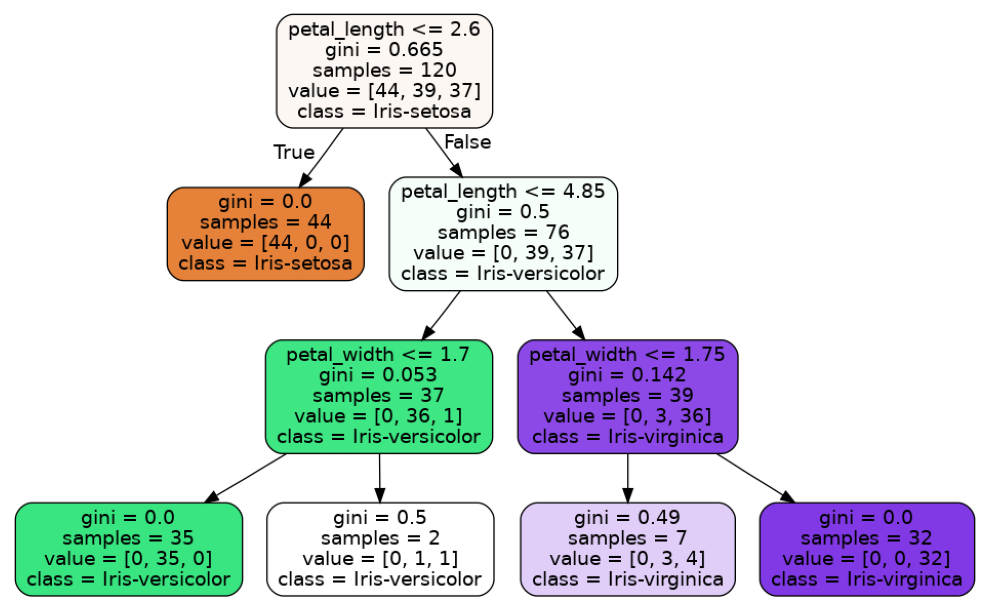

In [142]:
# 用Graphviz的dot命令行工具，生成png
subprocess.run(['dot', '-Tpng', './assets/iris_tree.dot',
                 '-o', './assets/iris_tree.png'])
# 显示图片
plt.figure(figsize=(10, 8))
plt.imshow(plt.imread('./assets/iris_tree.png'))
plt.axis('off')
plt.tight_layout()
plt.show()

### estimating

**估计类概率**

决策树也可以估计一个实例属于一个特定的类 k 的概率：首先它遍历树以找到该实例的叶节点，然后它返回该节点中类 k 的训练实例的**比例**。

**估计类**

返回**比例**最大的类作为实例的预测类。

In [200]:
y_pred = tree_clf.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [144]:
tree_clf.predict_proba(X_test)

array([[0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.

In [202]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred, average='weighted'))

Accuracy:  0.9
Precision:  0.9027777777777779
Recall:  0.9
F1-score:  0.9001739130434783


### hyperparameters comparison

用不同的超参数组合来训练决策树模型，并比较模型的效果。

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


X_iris = iris_data.iloc[:, :-1]
y_iris = iris_data.iloc[:, -1]

param_grid = {
    'min_samples_split': [2, 3, 4],
    'max_depth': [2, 3, 4, None],
    'max_features': ['sqrt', 'log2'],
}
dt_clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(
    dt_clf, param_grid, cv=5, n_jobs=-1,
    scoring = 'precision_micro'
)
grid_search.fit(X_iris, y_iris)

/home/zqy/.local/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4]},
             scoring='precision_micro')

得到所有参数组合里，最好的estimator

In [22]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=42)

看看最佳的precision，效果比随机选的hyperparameters高大概5%左右

In [25]:
grid_search.best_score_

0.9400000000000001

## decision regression tree

### train and visualization

decision regressor 是一个回归模型，它可以预测一个连续变量的输出值。

用MSE作为impurity function，cost function 如下：

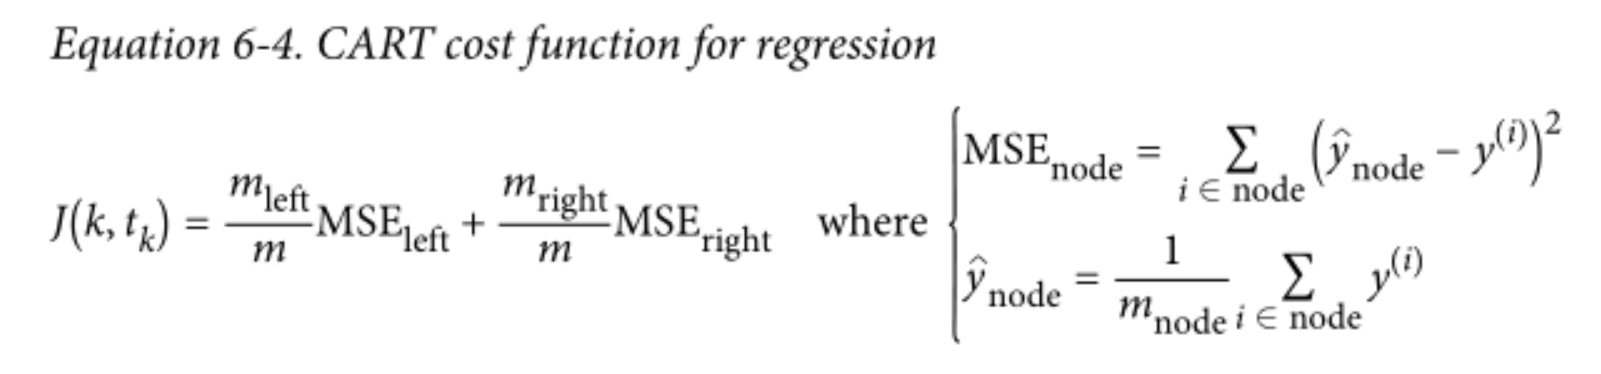


In [189]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz


# 数据准备
col = ['freetime', 'goout', 'Dalc']
X_train = train_student.loc[:, col]
X_test = test_student.loc[:, col]
y_train = train_student.loc[:, 'G1']
y_test = test_student.loc[:, 'G1']
# 训练
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg.fit(X_train, y_train)
# 图示
dot_path = os.path.join(os.getcwd(), 'assets', 'iris_reg_tree.dot')
export_graphviz(
    tree_reg,
    out_file = dot_path,
    feature_names = col,
    rounded = True, # 圆角方框
    filled = True, # 填充颜色
)

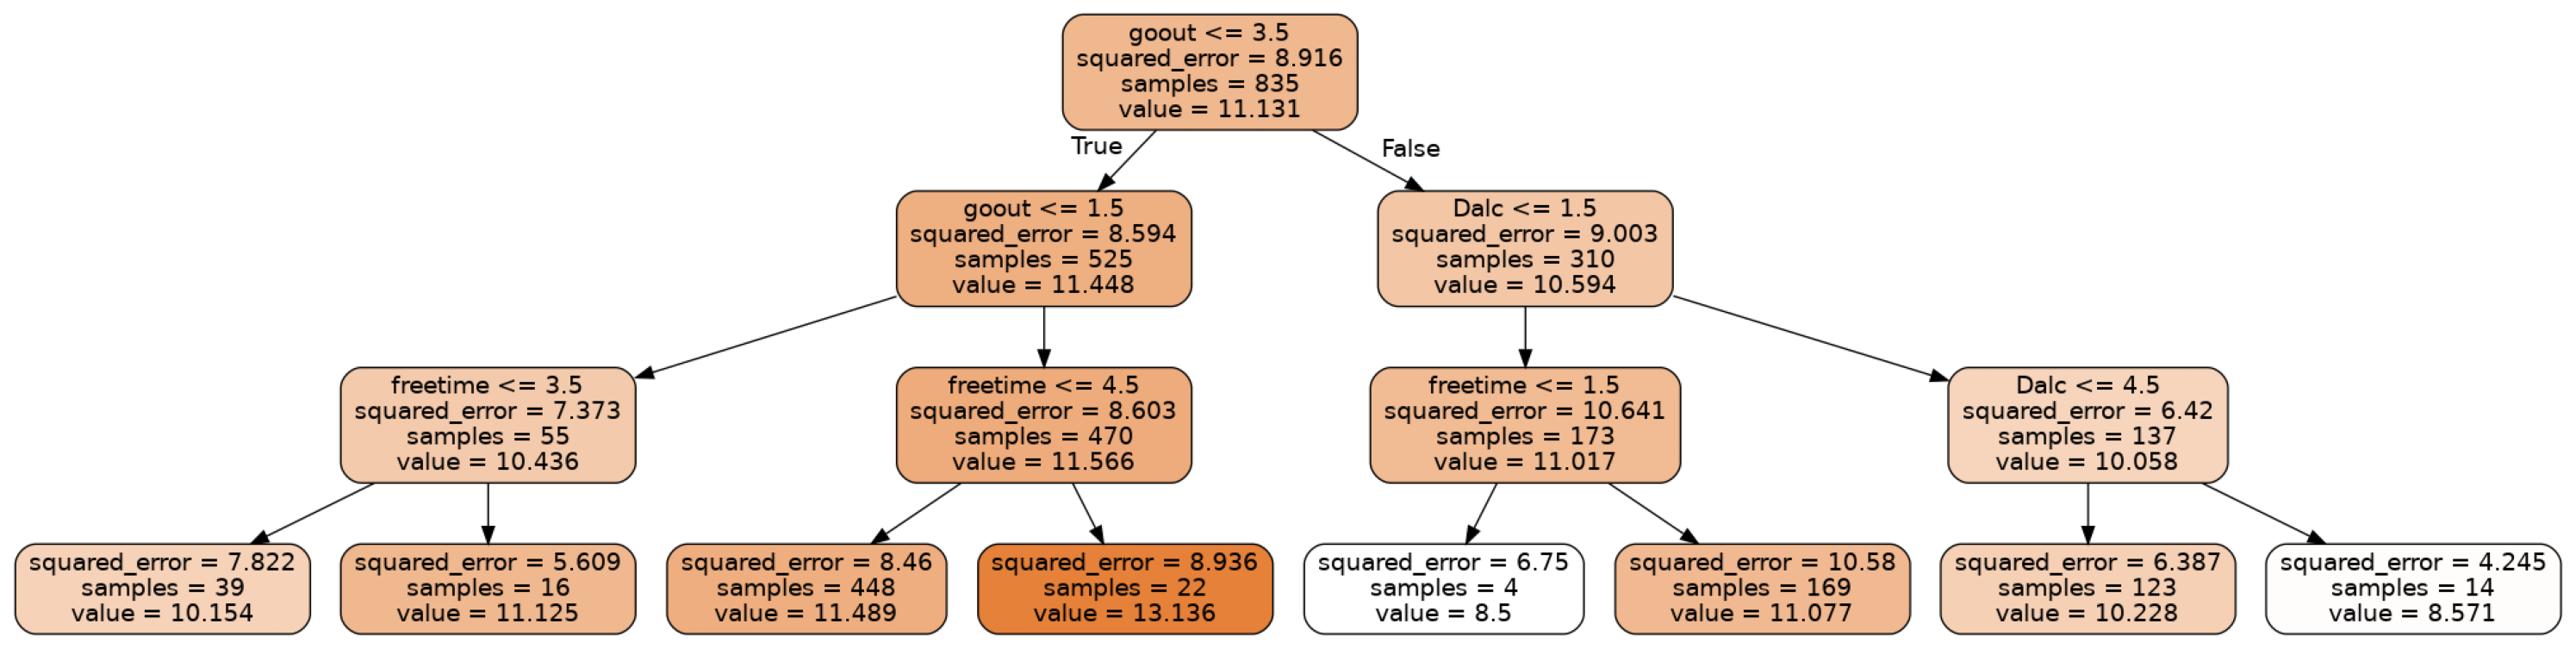

In [190]:
# 用Graphviz的dot命令行工具，生成png
subprocess.run(['dot', '-Tpng', './assets/iris_reg_tree.dot',
                 '-o', './assets/iris_reg_tree.png'])
# 显示图片
plt.figure(figsize=(30, 10))
plt.imshow(plt.imread('./assets/iris_reg_tree.png'))
plt.axis('off')
plt.tight_layout()
plt.show()

### prediction

预测结果会得到每个叶子节点的value值，即是叶子节点样本的均值

In [191]:
tree_reg.predict(X_test)

array([11.48883929, 11.07692308, 11.48883929, 11.07692308, 13.13636364,
       11.07692308, 10.22764228, 10.22764228, 11.48883929, 10.22764228,
       10.22764228, 11.07692308, 10.22764228, 11.48883929, 11.07692308,
       10.15384615, 11.07692308, 10.22764228, 11.07692308, 10.15384615,
       11.48883929, 11.48883929, 10.22764228, 11.07692308, 10.22764228,
       11.48883929, 11.48883929, 11.48883929, 11.48883929, 11.07692308,
       10.15384615, 10.22764228, 11.48883929, 11.48883929, 11.48883929,
       11.48883929, 11.07692308, 11.48883929, 11.48883929, 11.48883929,
       11.48883929, 11.48883929, 11.48883929, 11.48883929, 11.48883929,
       11.48883929, 11.48883929, 11.48883929, 11.48883929, 11.48883929,
       11.48883929, 11.48883929, 11.48883929, 11.48883929,  8.57142857,
       11.48883929, 10.22764228, 11.48883929, 10.15384615, 11.48883929,
       10.22764228, 11.48883929, 11.48883929, 11.48883929, 11.48883929,
       11.48883929, 11.07692308, 11.07692308, 11.48883929, 10.22

# numpy

用 numpy 实现决策树算法，用的是gini impurity 作为划分标准。

**用iris数据集**

* train and predict

In [7]:
from Numpy.decision_tree import DecisionTreeClassifier as dtc_numpy


# X_train.reset_index(drop=True, inplace=True)
# y_train.reset_index(drop=True, inplace=True)
# X_test.reset_index(drop=True, inplace=True)
# y_test.reset_index(drop=True, inplace=True)
dtc = dtc_numpy(max_depth=4)
dtc.fit(X_train, y_train)

Tree is built.


* testing

In [9]:
from Numpy.metrics import Metrics


y_pred = dtc.predict(X_train)
print("Accuracy Score:", Metrics.accuracy(y_train, y_pred))
print("Precision Score:", Metrics.precision(y_train, y_pred, type="micro"))
print("Recall Score:", Metrics.recall(y_train, y_pred, type="micro"))
print("F1 Score:", Metrics.f1(y_train, y_pred, type="micro"))

Accuracy Score: 0.9833333333333333
Precision Score: 0.9833333333333333
Recall Score: 0.9833333333333333
F1 Score: 0.9833333333333333


* visualization of decision tree

Tree picture is saved in /home/zqy/learningFile/machineLearning/machine-learning-notebook/code/assets/tree_tmp.png


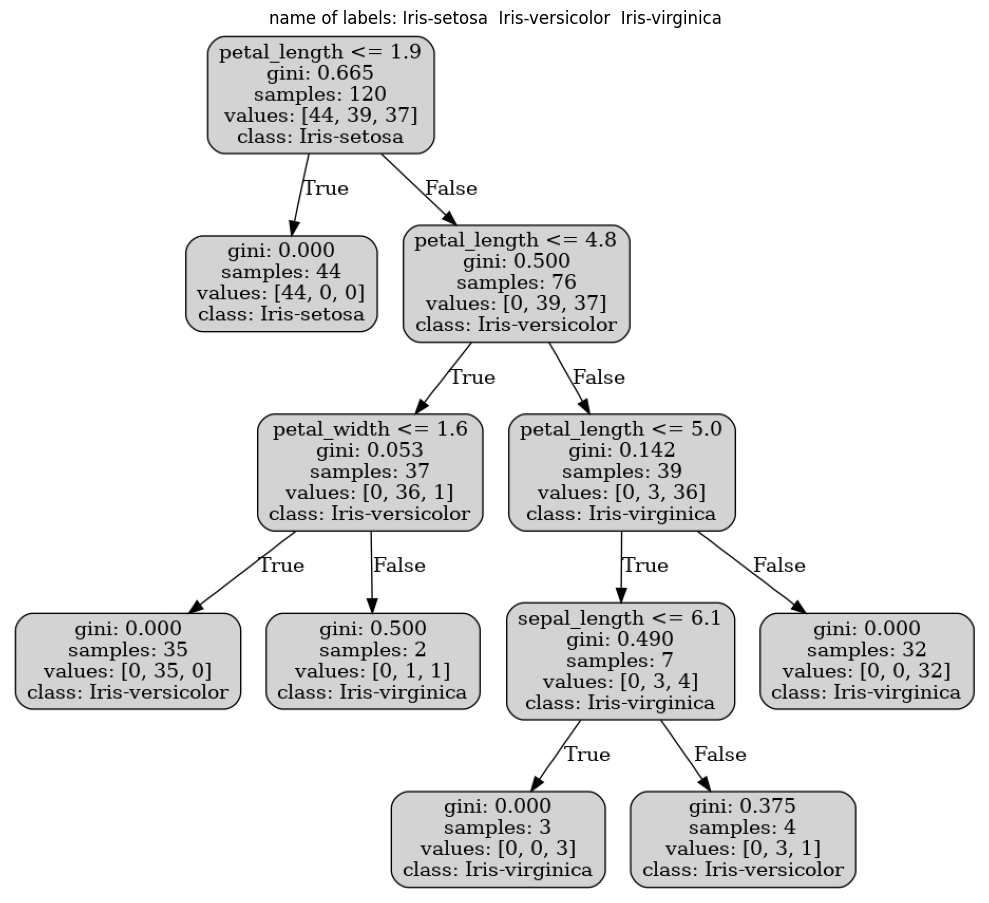

In [13]:
from matplotlib import pyplot as plt
img_path = dtc.show()
plt.figure(figsize=(10, 10))
plt.imshow(plt.imread(img_path))
plt.axis('off')
plt.tight_layout()
plt.title(f"name of labels: {'  '.join(dtc.y_labels)}")
plt.show()